In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline
from entropy_complexity import entropy_complexity, get_borders
from tqdm import tqdm
from math import factorial
from Lorentz_series import Lorentz

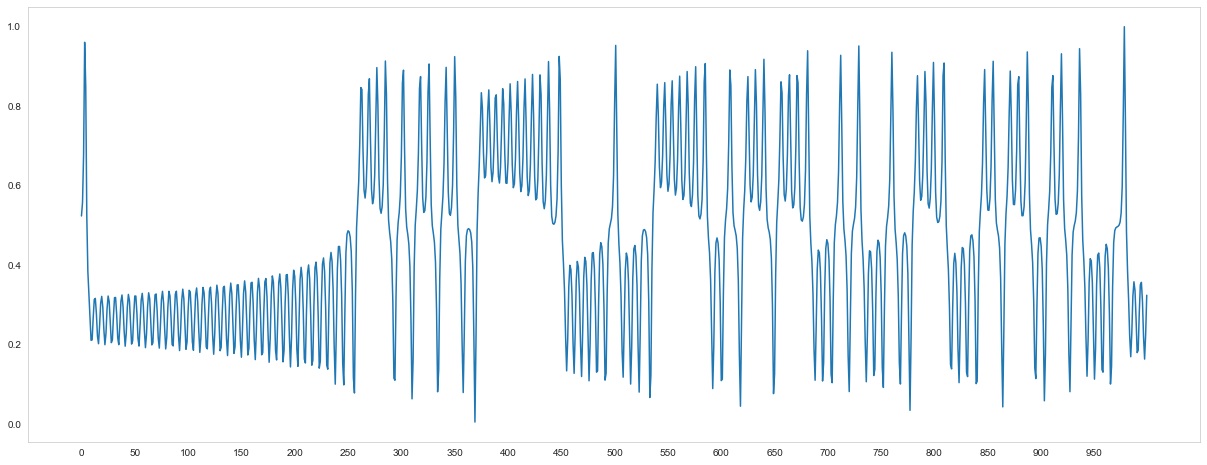

In [2]:
xs, _, _ = Lorentz().generate(0.1, 10300)
xs = (xs - xs.min()) / (xs.max() - xs.min())
plt.figure(figsize=(21, 8))
plt.plot(xs[0:1000])
plt.xticks([i for i in range(0, 1000, 50)])
plt.grid()
plt.show()

In [3]:
xs_trunc = xs[301:]

In [4]:
def logistic(r=4, n=100000, x0=.4):
    x = np.zeros(n)
    x[0] = x0
    for i in range(n-1):
        x[i+1] = r*x[i]*(1-x[i])
    return(x)

In [5]:
logistic_series = logistic(n=len(xs_trunc))
white_noise = np.random.normal(size=len(xs_trunc))

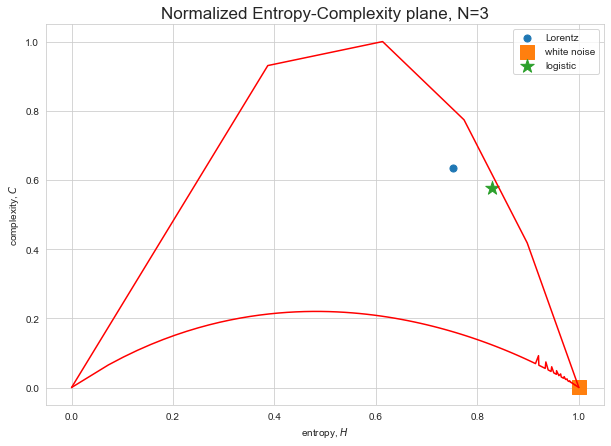

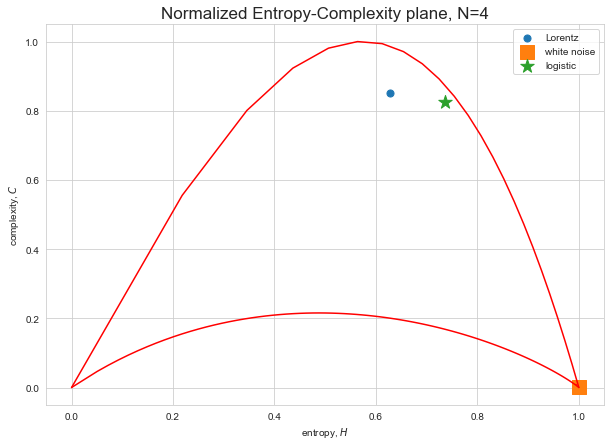

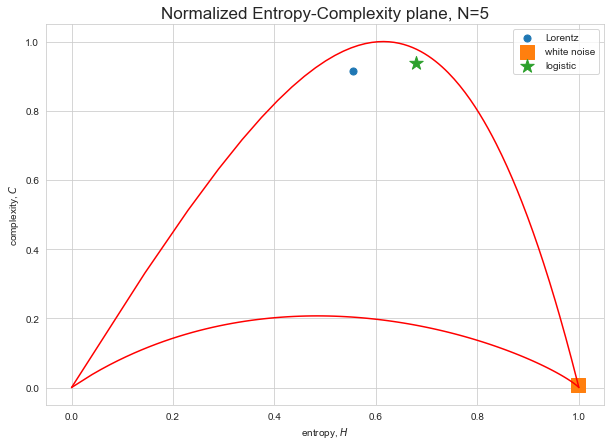

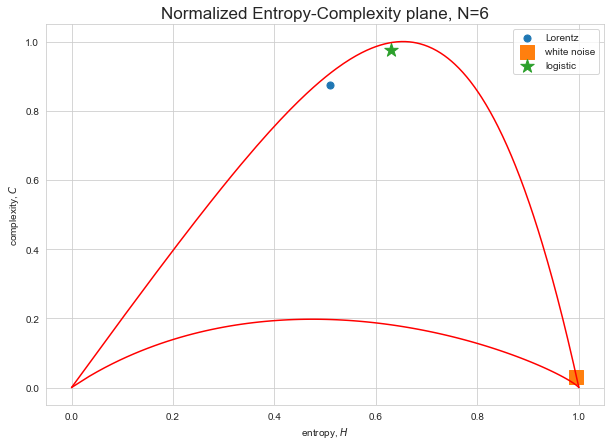

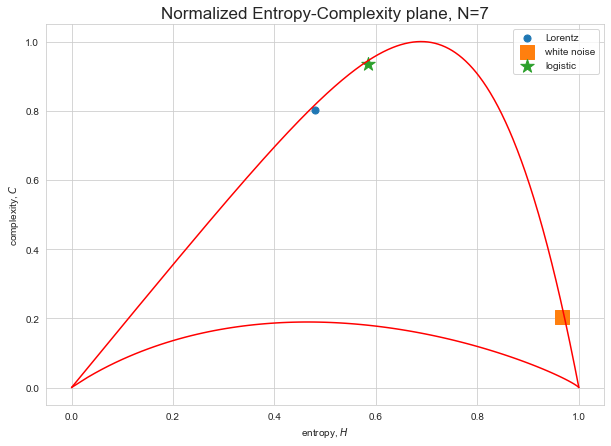

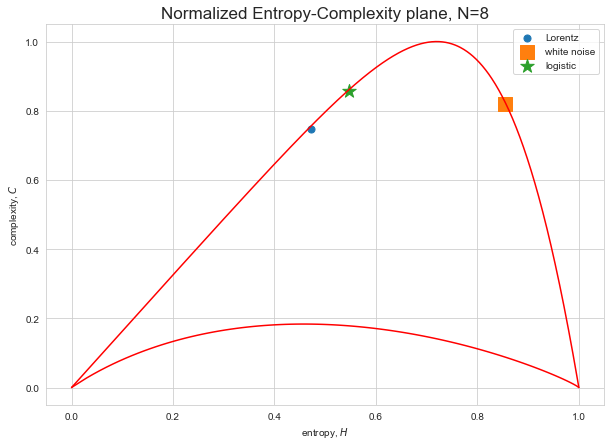

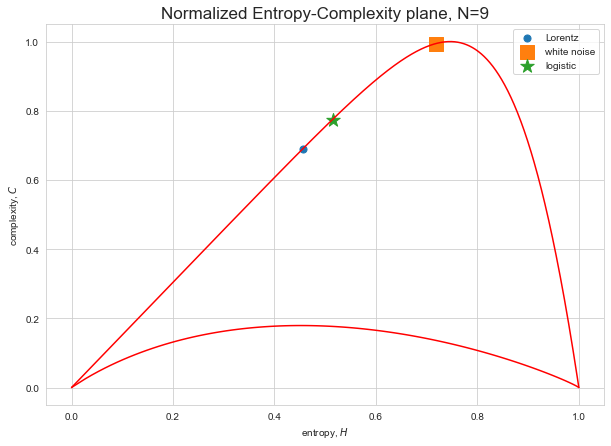

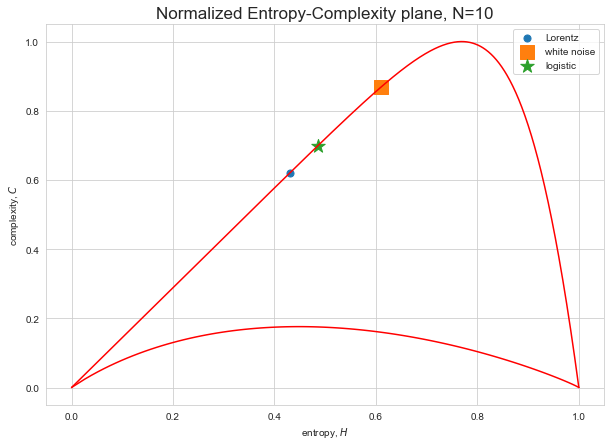

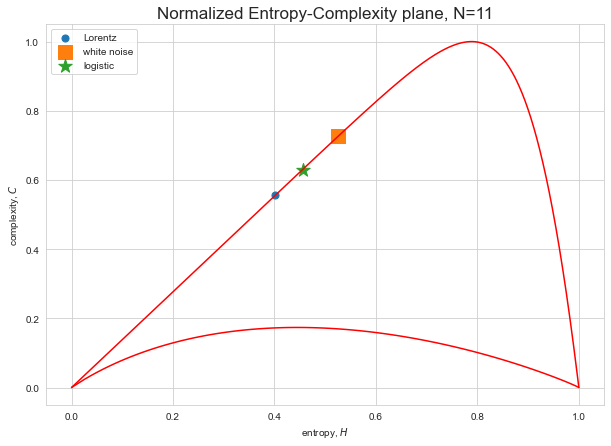

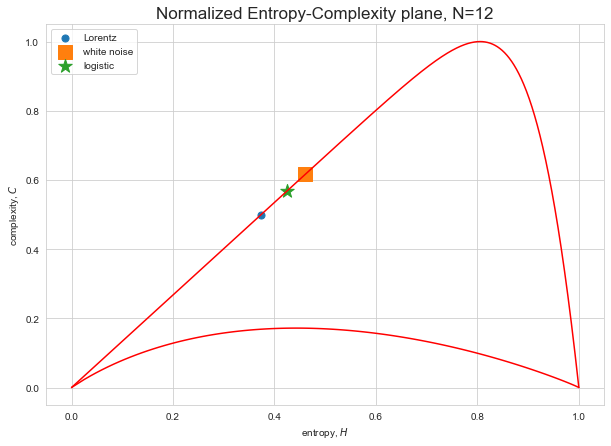

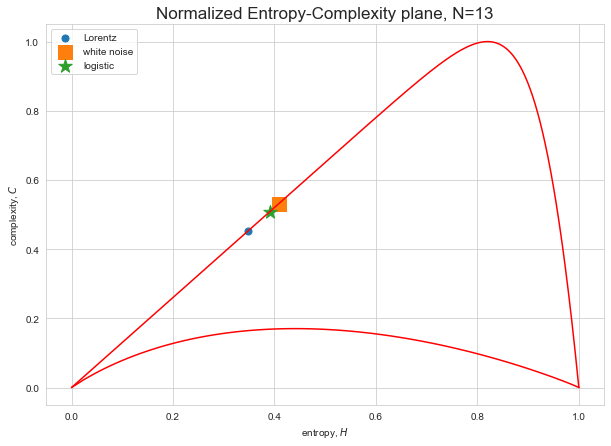

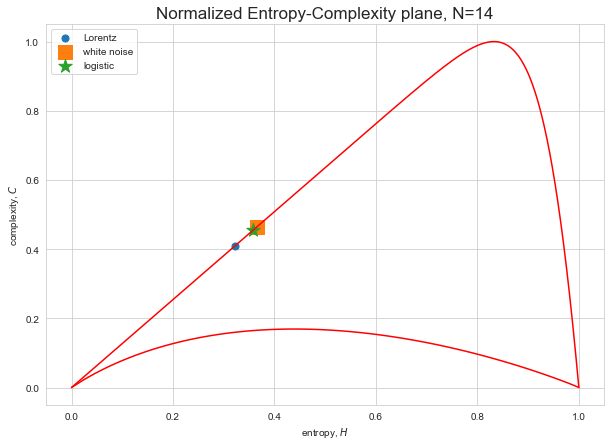

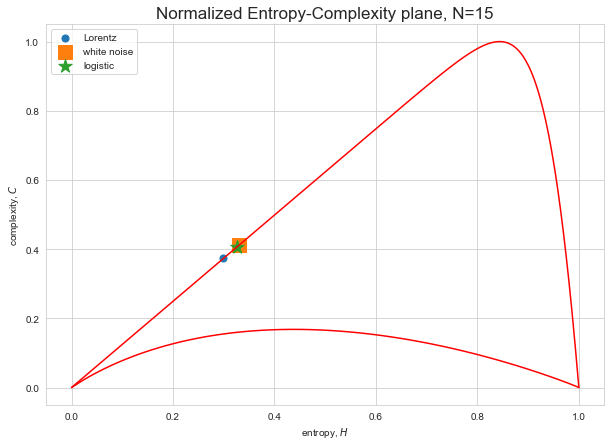

In [6]:
lorentz_trajectory = []
noise_trajectory = []
logistic_trajectory = []
for N in range(3, 16):
    M = 1
    min_ec, max_ec = get_borders(n=N, m=M)
    apex = max(max_ec.T[1])
    max_ec.T[1] /= apex #нормализуем верхнюю границу плоскости
    
    ec_lorentz = list(entropy_complexity(xs_trunc, n=N, m=M))
    ec_lorentz[1] /= apex
    lorentz_trajectory.append(ec_lorentz)
    
    ec_noise = list(entropy_complexity(white_noise, n=N, m=M))
    ec_noise[1] /= apex
    noise_trajectory.append(ec_noise)
    
    ec_logistic = list(entropy_complexity(logistic_series, n=N, m=M))
    ec_logistic[1] /= apex
    logistic_trajectory.append(ec_logistic)
    
    
    f, ax = plt.subplots(1,1,figsize=(10, 7))
    ax.plot(max_ec[:,0], max_ec[:,1],color='r')
    ax.plot(min_ec[:,0], min_ec[:,1],color='r')
    
    ax.scatter(*ec_lorentz, label="Lorentz", s=200, marker='.')
    ax.scatter(*ec_noise, label="white noise", s=200, marker='s')
    ax.scatter(*ec_logistic, label="logistic", s=200, marker='*')
    
    ax.set_xlabel('entropy, $H$')
    ax.set_ylabel('complexity, $C$')
    plt.title("Normalized Entropy-Complexity plane, N=%s" % (N), fontsize = 17)
    ax.legend()
    plt.show()

<AxesSubplot:>

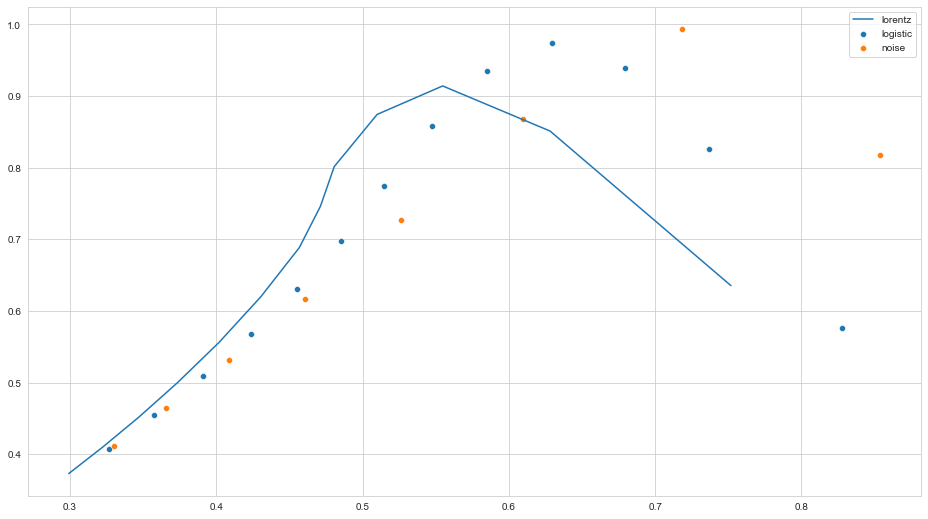

In [48]:
plt.figure(figsize=(16, 9))
sns.lineplot(x=np.array(lorentz_trajectory).T[0], y=np.array(lorentz_trajectory).T[1], label="lorentz")
sns.scatterplot(x=np.array(logistic_trajectory).T[0], y=np.array(logistic_trajectory).T[1], label="logistic")
sns.scatterplot(x=np.array(noise_trajectory).T[0][5:], y=np.array(noise_trajectory).T[1][5:], label="noise")

In [49]:
shifted_noise = np.array(noise_trajectory[5:])
trunc_lorentz = np.array(lorentz_trajectory[:len(shifted_noise)])
trunc_logistic = np.array(logistic_trajectory[:len(shifted_noise)])

In [50]:
def normalizing_function(trajectory, trajectory_norm):
    return trajectory / np.power(trajectory_norm, 0.25)

In [51]:
normalized_lorentz = normalizing_function(trunc_lorentz, shifted_noise)

In [52]:
normalized_logistic = normalizing_function(trunc_logistic, shifted_noise)

In [ ]:
for N in range(3, 16):
    M = 1
    
    min_ec, max_ec = get_borders(n=N, m=M)
    apex = max(max_ec.T[1])
    max_ec.T[1] /= apex
    
    f, ax = plt.subplots(1,1,figsize=(10, 7))
    ax.plot(max_ec[:,0], max_ec[:,1],color='r')
    ax.plot(min_ec[:,0], min_ec[:,1],color='r')
    
    ax.scatter(*normalized_lorentz[N-3], label="normalized lorentz", s=200, marker='.')
    ax.scatter(*normalized_logistic[N-3], label="normalized logistic", s=200, marker='*')
    
    ax.set_xlabel('entropy, $H$')
    ax.set_ylabel('complexity, $C$')
    plt.title("Normalized Entropy-Complexity plane, N=%s" % (N), fontsize = 17)
    ax.legend()
    plt.show()

Рассматриваемые длины: 10_000, 100_000, 1_000_000 (?) - наиболее приближенные длины к реальным длинам текстов. <br>
N $\in [3; 16] $. Стоит рассматривать больше, к примеру N $\in [4; 20]$

## Перейдем к работе с хаотическими рядами

In [8]:
def skew_tent_map(n=100000, mu=1.9, x0=.4): #Skew tent
    x = np.zeros(n)
    x[0] = x0
    
    for i in range(1, len(x)):
        if x[i-1] < .5:
            x[i] = x[i-1]*mu
        else:
            x[i] = (1-x[i-1])*mu
    
    return x

In [9]:
def logistic(r=4, n=100000, x0=.4):
    x = np.zeros(n)
    x[0] = x0
    for i in range(n-1):
        x[i+1] = r*x[i]*(1-x[i])
    return(x)

In [14]:
def henon_map(n=1000000, a=1.4, b=0.3, x0=.4, x1=0.2): #Henon map
    x = np.zeros(n)
    x[0] = x0
    x[1] = x1
    for i in range(2, len(x)):
        x[i] = 1 - a * x[i-1] ** 2 + b * x[i-2]
    return x

In [10]:
texts = np.load("eng_texts_svd.npy", allow_pickle=True)
sample_text = texts[2]
sample_text = sample_text.flatten()

In [15]:
# 10^5 длина
LEN = len(sample_text)
skew_tent = skew_tent_map(n=LEN)
log = logistic(n=LEN)
henon = henon_map(n=LEN)
xs, _, _ = Lorentz().generate(0.1, LEN+300)
xs = (xs - xs.min()) / (xs.max() - xs.min())
lorenz = xs[301:]

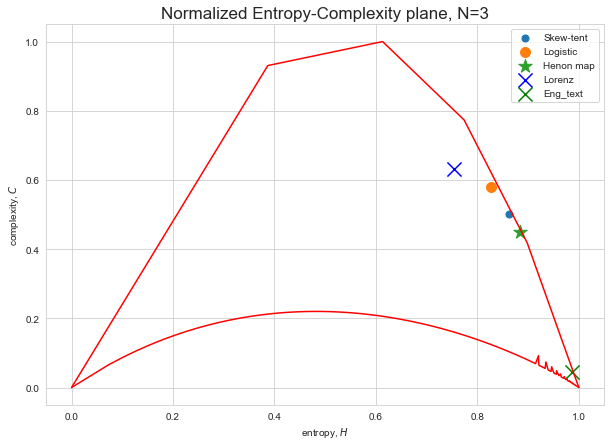

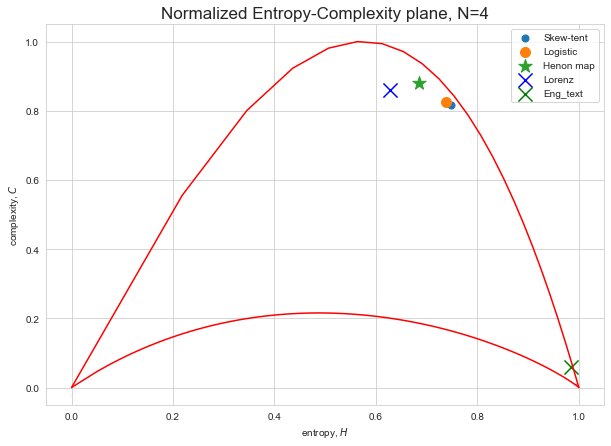

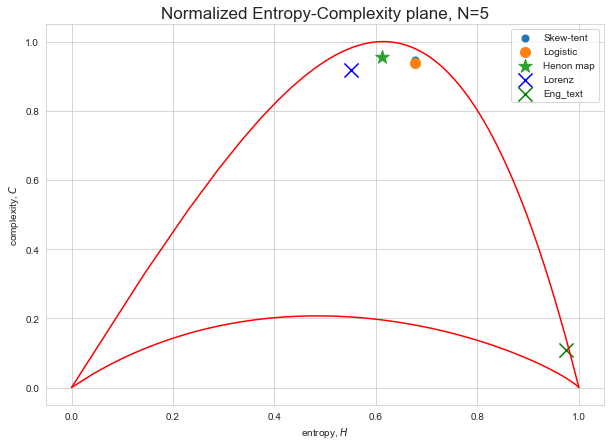

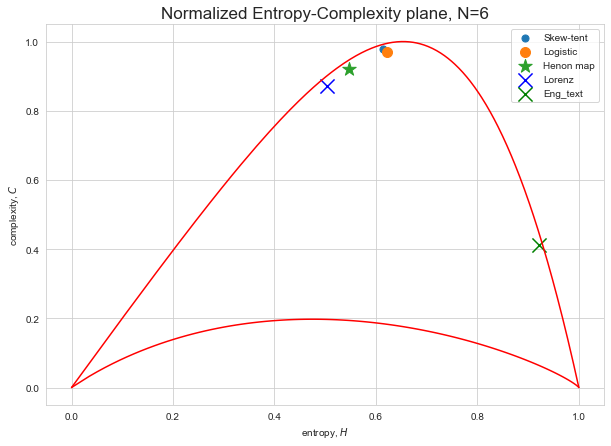

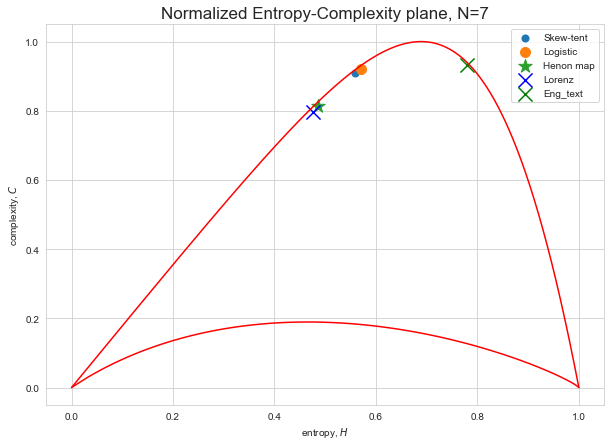

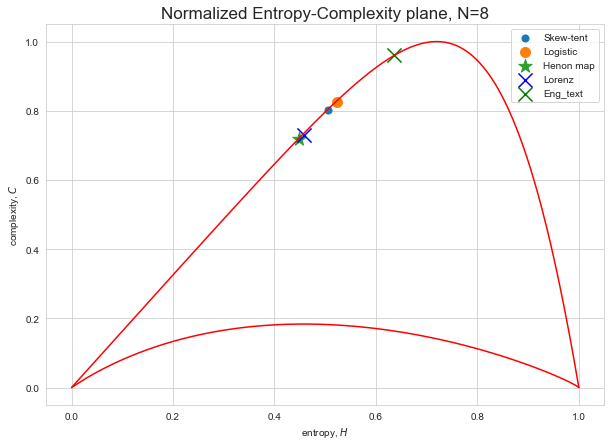

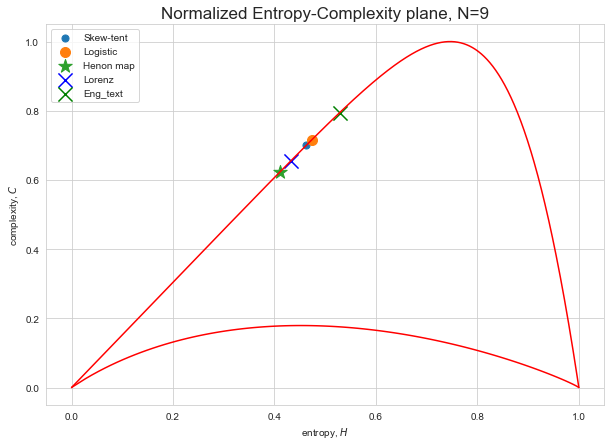

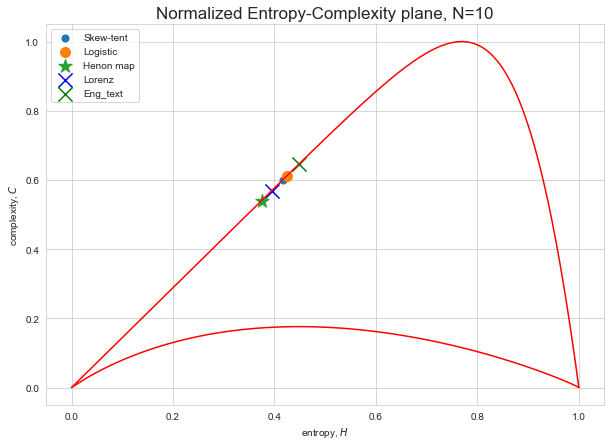

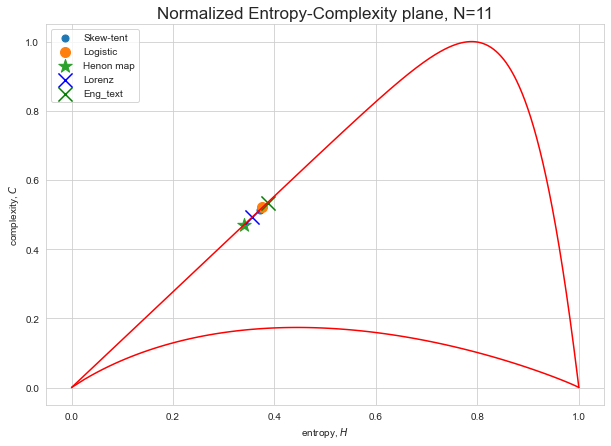

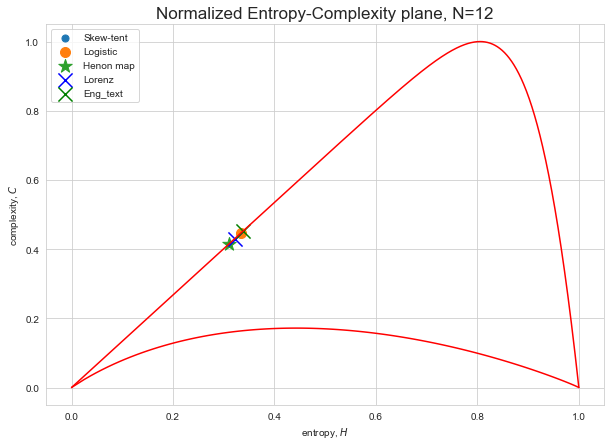

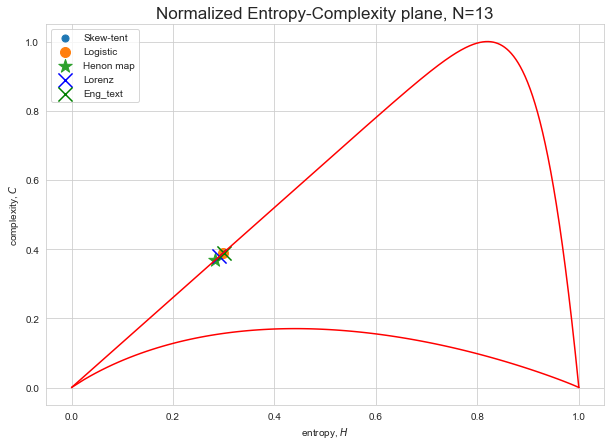

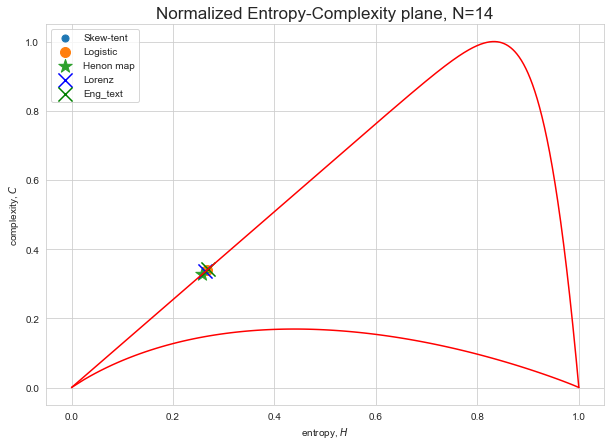

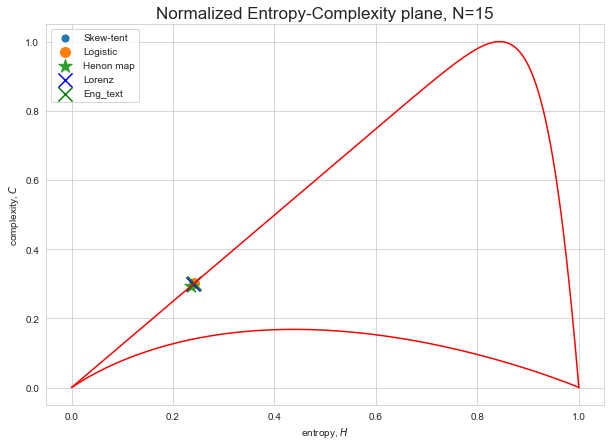

In [26]:
skew_tent_trajectory = []
logistic_trajectory = []
henon_map_trajectory = []
lorenz_trajectory = []
text_trajectory = []
for N in range(3, 16):
    M = 1
    min_ec, max_ec = get_borders(n=N, m=M)
    apex = max(max_ec.T[1])
    max_ec.T[1] /= apex #нормализуем верхнюю границу плоскости
    
    ec_skew_tent = list(entropy_complexity(skew_tent, n=N, m=M))
    ec_skew_tent[1] /= apex
    skew_tent_trajectory.append(ec_skew_tent)
    
    ec_log = list(entropy_complexity(log, n=N, m=M))
    ec_log[1] /= apex
    logistic_trajectory.append(ec_log)
    
    ec_henon = list(entropy_complexity(henon, n=N, m=M))
    ec_henon[1] /= apex
    henon_map_trajectory.append(ec_henon)
    
    ec_lorenz = list(entropy_complexity(lorenz, n=N, m=M))
    ec_lorenz[1] /= apex
    lorenz_trajectory.append(ec_lorenz)
    
    ec_text = list(entropy_complexity(sample_text, n=N, m=M))
    ec_text[1] /= apex
    text_trajectory.append(ec_text)
    
    f, ax = plt.subplots(1,1,figsize=(10, 7))
    ax.plot(max_ec[:,0], max_ec[:,1],color='r')
    ax.plot(min_ec[:,0], min_ec[:,1],color='r')
    
    ax.scatter(*ec_skew_tent, label="Skew-tent", s=200, marker='.')
    ax.scatter(*ec_log, label="Logistic", s=100, marker='o')
    ax.scatter(*ec_henon, label="Henon map", s=200, marker='*')
    ax.scatter(*ec_lorenz, label="Lorenz", s=200, marker='x', c="blue")
    ax.scatter(*ec_text, label="Eng_text", s=200, marker='x', c="green")


    
    
    ax.set_xlabel('entropy, $H$')
    ax.set_ylabel('complexity, $C$')
    plt.title("Normalized Entropy-Complexity plane, N=%s" % (N), fontsize = 17)
    ax.legend()
    plt.show()

In [27]:
skew_tent_trajectory = np.array(skew_tent_trajectory)
logistic_trajectory = np.array(logistic_trajectory)
henon_map_trajectory = np.array(henon_map_trajectory)
lorenz_trajectory = np.array(lorenz_trajectory)
text_trajectory = np.array(text_trajectory)

In [28]:
np.sqrt((lorenz_trajectory - logistic_trajectory)**2)

array([[0.07319412, 0.05165087],
       [0.11096126, 0.0328647 ],
       [0.12731815, 0.02038327],
       [0.11671876, 0.098443  ],
       [0.09582404, 0.12208251],
       [0.06504333, 0.09461644],
       [0.04066755, 0.06023773],
       [0.02995883, 0.04303194],
       [0.02002072, 0.0276975 ],
       [0.01188933, 0.01591116],
       [0.007152  , 0.00930926],
       [0.00398811, 0.00507172],
       [0.00213128, 0.00265749]])

In [25]:
lorenz_trajectory.shape

(26, 2)